# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [2]:
                               import numpy as np
from numpy.random              import RandomState
from numpy                     import percentile
                               import pandas as pd
                               import seaborn as sns
                               import matplotlib.pyplot as plt
                               import scipy as st
from scipy.stats               import shapiro , normaltest
from sklearn.feature_selection import SelectKBest , f_classif

from sklearn.model_selection   import train_test_split
from sklearn.model_selection   import cross_val_score, cross_val_predict
from sklearn.model_selection   import GridSearchCV
from sklearn.preprocessing     import StandardScaler
from sklearn.preprocessing     import MinMaxScaler 

from sklearn.svm               import SVR
from sklearn.linear_model      import LinearRegression
from sklearn.tree              import DecisionTreeRegressor 
from sklearn.ensemble          import RandomForestRegressor
from sklearn.metrics           import *
from sklearn.multioutput       import MultiOutputRegressor
from sklearn.experimental      import enable_iterative_imputer
from sklearn.impute            import KNNImputer


In [3]:
# Загружаем данные в переменные
df_train = pd.read_csv(r"C:\Users\ivan\datasets\gold_recovery_train.csv")
df_test = pd.read_csv(r"C:\Users\ivan\datasets\gold_recovery_test.csv")
df_full = pd.read_csv(r"C:\Users\ivan\datasets\gold_recovery_full.csv")

In [4]:
# Обучающая выборка
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [541]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [5]:
# Тестовая выборка
df_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [543]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [544]:
df_full.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [545]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [546]:
# Проверим правильность расчета концентрации золота
C = df_train['final.output.concentrate_au']  # C — доля золота в концентрате после флотации/очистки;
F = df_train['rougher.input.feed_au']        # F — доля золота в сырье/концентрате до флотации/очистки;
T = df_train['final.output.tail_au']         # T — доля золота в отвальных хвостах после флотации/очистки.

# Расчет концентрации
Recovery = 100 * C * (F - T) / (F*(C - T))

# проверка расчета 
check = Recovery - df_train['final.output.recovery']

# средняя абсолютная ошибка
MAE = abs(check).sum() / len(check)
print('Средняя ошибка проверки recovery:', MAE)

Средняя ошибка проверки recovery: 8.863350445046566e-15


In [547]:
df_full[['rougher.output.tail_au' , 
        'primary_cleaner.output.tail_au',
        'secondary_cleaner.output.tail_au',
        'final.output.tail_au']].head(10)

,rougher.output.tail_au,primary_cleaner.output.tail_au,secondary_cleaner.output.tail_au,final.output.tail_au
0,1.170244,2.106679,2.606185,2.143149
1,1.184827,2.353017,2.488248,2.224930
2,1.162562,2.416800,2.458187,2.257889
3,1.079755,2.262051,2.322062,2.146849
4,1.012642,2.277073,2.330448,2.055292
5,0.915835,2.114558,2.192127,1.918586
6,0.986248,2.223152,2.316720,2.058913
7,1.116110,2.112025,2.192197,2.143437
8,1.186780,2.243817,2.212084,2.209881
9,1.167140,2.025454,2.073737,2.209593


In [548]:
# Столбцы, не вошедшие в тестовую выборку
test_no_columns = set(df_train.columns) - set(df_test.columns)
test_no_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Определяем признаки в обучающей выборке , и недоступные  в тестовой выборке:

In [549]:
set(df_train.columns) & set(df_test.columns)

{'date',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air'

#### Проверка дубликатов

In [550]:
#### Проверка дубликатов в обучающей выборке
df_train.duplicated().sum() 

0

In [551]:
#### Проверка дубликатов в тестовой выборке
df_test.duplicated().sum() 

0

In [552]:
#### Проверка дубликатов в общей выборке
df_full.duplicated().sum() 

0

#### Заполнение пропусков


In [6]:
def imputer(data):
    date_series = pd.to_datetime(data['date'], format = "%Y-%m-%d %H:%M:%S") # преобразуем и записываем дату в другой сериес
    data = data.drop(['date'] , axis = 1)                    # Исключаем столбец с датой
    imp = KNNImputer()
    data_imputed = pd.DataFrame(data = imp.fit_transform(data) , columns = data.columns)
     # Объединяем столбец с датой и возвращаем заполненную таблицу 
    return pd.concat([date_series ,  data_imputed] , axis = 1)

In [7]:
# Заполняем пропуски во всех таблицах
df_train = imputer(df_train)
df_test  = imputer(df_test)
df_full  = imputer(df_full)

In [8]:
df_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [9]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [10]:
df_full.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [11]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null datetime64[ns]
final.output.concentrate_ag                           22716 non-null float64
final.output.concentrate_pb                           22716 non-null float64
final.output.concentrate_sol                          22716 non-null float64
final.output.concentrate_au                           22716 non-null float64
final.output.recovery                                 22716 non-null float64
final.output.tail_ag                                  22716 non-null float64
final.output.tail_pb                                  22716 non-null float64
final.output.tail_sol                                 22716 non-null float64
final.output.tail_au                                  22716 non-null float64
primary_cleaner.input.sulfate                         22716 non-null float64
primary_cleaner.input.depressant     

---

### Вывод:
1. По результатам рассмотрения датафреймов можно отметить следующие особенности:
 - В данных есть есть большое количество пропусков. 
 - Столбец с датой имеет тип данных object. Все числовые значения вещественные.
 - В обучающей выборке всего 87 столбцов, в тестовой - 53. В тестовой выборке отсутствуют значения концентраций веществ на разных этапах очистки сырья.
 
2. Для проверки рассчитана эффективность обогащения. Значение средней абсолютной ошибки составило 8.9е-15, что говорит о правильно найденном значении восстановленного золота, т.к. ошибка очень мала.

3. Методом Iterativeimputer() библиотеки sklearn заполнены пропуски во всех датафреймах.

# 2. Анализ данных

### 2.1. Анализ концентрации металлов на различных этапах очистки


In [18]:
# Функция выделяет список столбцов по каждому металлу
def metal_division(data):
    # создаем списки столбцов с названием _ag , _pb , _au
    ag = [column for column in data.columns if '_ag' in column] 
    pb = [column for column in data.columns if '_pb' in column]
    au = [column for column in data.columns if '_au' in column]
    # возвращаем словарь списков
    return {'ag': ag , 'pb': pb , 'au': au}

In [19]:
# Функция строит графики распределения концентрации металла по процессам
def metall_hist(data , metall_name):
    plt.figure(figsize = (18,8))
    for a in data.columns:
        ax = sns.distplot(data[a])
    ax.set_title('Концентрация ({}) на разных этапах тех. процесса'.format(metall_name), fontsize = 20)
    ax.legend(data.columns , fontsize = 12)
    ax.set_xlabel('Concentrate of {} in processes'.format(metall_name),fontsize = 15)
    return plt.show()

#### Анализ  Ag

In [20]:
# записываем в датафрейм только столбцы для Ag
ag = df_full[metal_division(df_full)['ag']]

# выделяем столбцы концентраций на выходе из процесса
ag = ag[['rougher.input.feed_ag' ,
         'rougher.output.concentrate_ag' ,  
         'primary_cleaner.output.concentrate_ag', 
         'final.output.concentrate_ag' ]]


In [21]:
ag.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,6.100378,11.500771,8.547551,6.055403
1,6.161113,11.615865,8.558743,6.029369
2,6.116455,11.695753,8.603505,6.055926
3,6.043309,11.915047,7.221879,6.047977
4,6.060915,12.411054,9.089428,6.148599


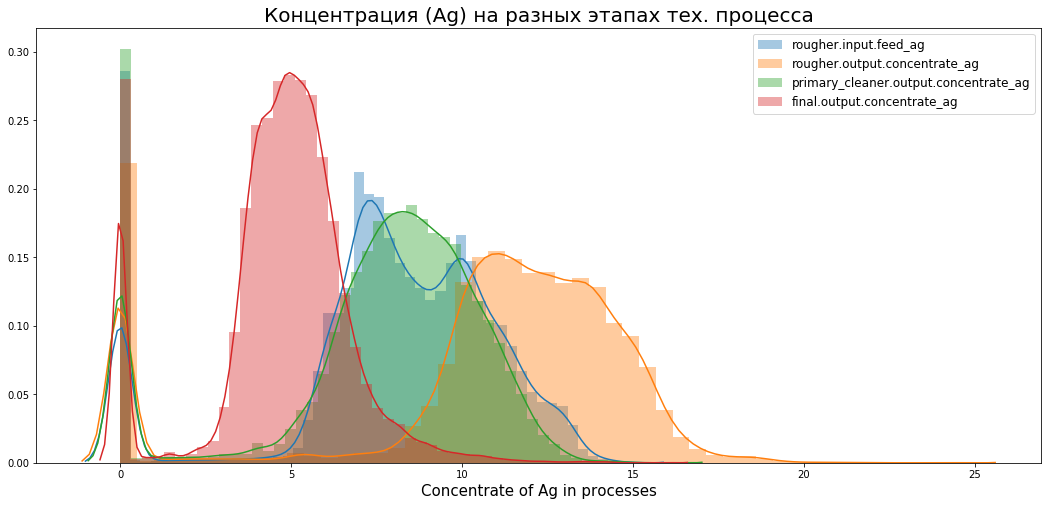

In [22]:
metall_hist(ag , "Ag")

#### Анализ  Pb

In [23]:
# записываем в датафрейм только столбцы для Pb
pb = df_full[metal_division(df_full)['pb']]

# выделяем столбцы концентраций на выходе из процесса
pb = pb[['rougher.input.feed_pb' , 
         'rougher.output.concentrate_pb' ,     
         'primary_cleaner.output.concentrate_pb', 
         'final.output.concentrate_pb' 
         ]]


In [24]:
pb.head()

,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,2.284912,7.101074,10.389648,9.889648
1,2.266033,7.278807,10.497069,9.968944
2,2.159622,7.216833,10.354494,10.213995
3,2.037807,7.175616,8.496563,9.977019
4,1.786875,7.240205,9.986786,10.142511


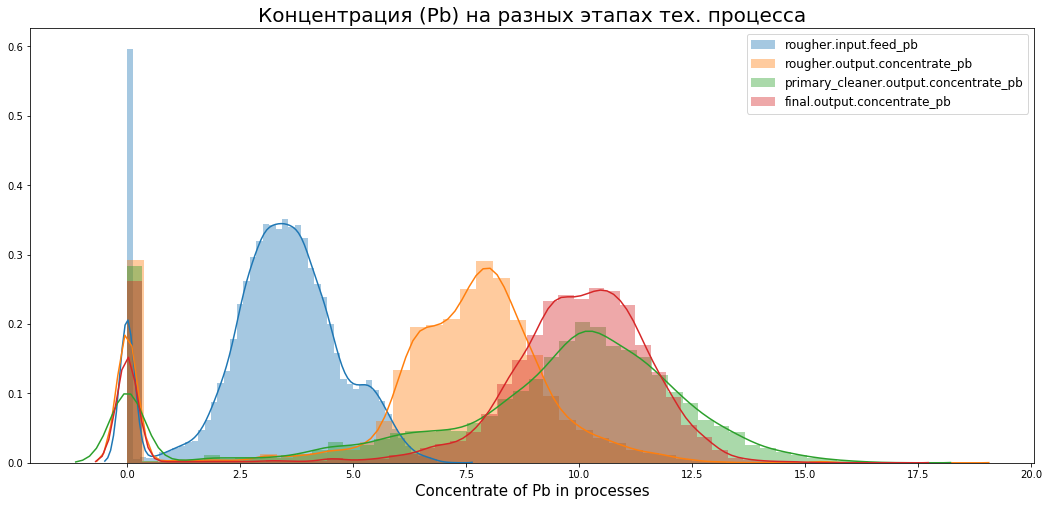

In [25]:
metall_hist(pb , "Pb")

#### Анализ  Au

In [26]:
# записываем в датафрейм только столбцы для Au
au = df_full[metal_division(df_full)['au']]

# выделяем столбцы концентраций на выходе из процесса
au = au[['rougher.input.feed_au' , 
         'rougher.output.concentrate_au' , 
         'primary_cleaner.output.concentrate_au', 
         'final.output.concentrate_au' ]]

In [27]:
au.head()

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,6.486150,19.793808,34.174427,42.192020
1,6.478583,20.050975,34.118526,42.701629
2,6.362222,19.737170,33.969464,42.657501
3,6.118189,19.320810,28.260743,42.689819
4,5.663707,19.216101,33.044932,42.774141


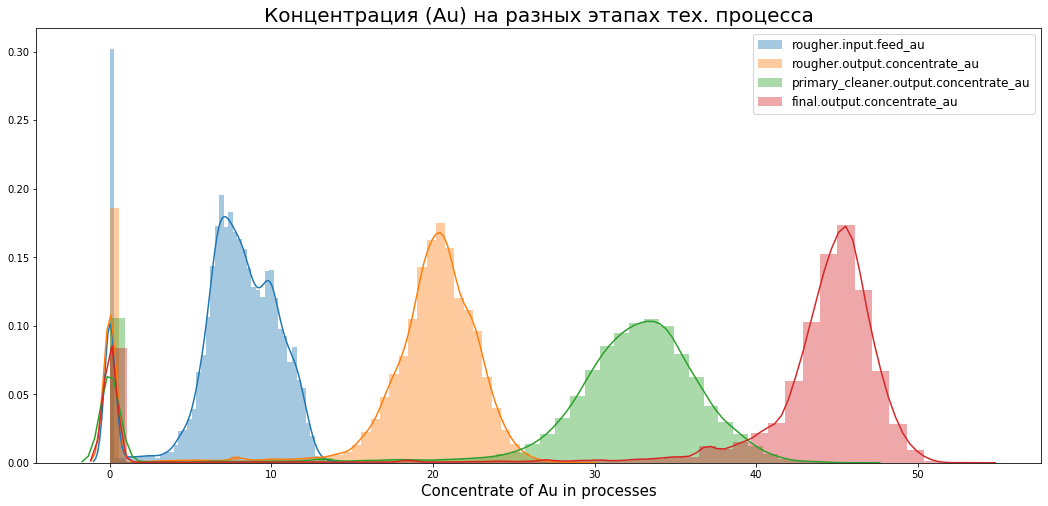

In [28]:
metall_hist(au , "Au")

### Выводы:
Методом библиотеки seaborn  построены распределения концентрации металлов в исходном сырье, первой степени очистки и финально
Можно отметить следующие особенности:
- в значениях концентрации отмечаются выбросы , большое количество нулевых значений.
- при большей степени очистки концентрация Ag уменьшается.
- концентрация Pb на финальном этапе очистки незначительно увеличивается относительно исходного сырья. Можно предположить, что это вызвано уменьшением концентрации серебра Ag.
- концентрация золота на финальном этапе очистки увеличивается более чем в 2 раза относительно исходного сырья. 


---

### 2.2. Сравнение гранул сырья на обучающей и тестовой выборках

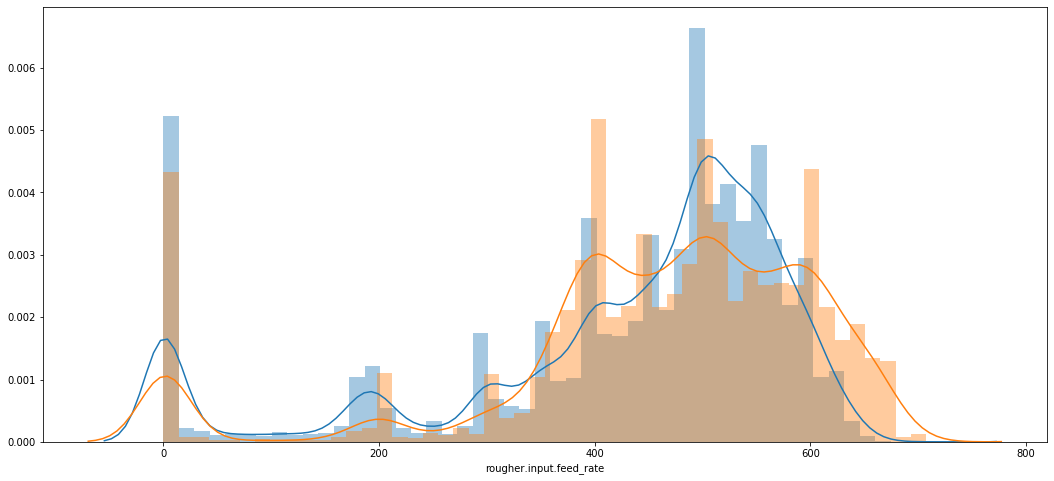

In [29]:
plt.figure(figsize = (18,8))
sns.distplot(df_train['rougher.input.feed_rate'] , bins=50)
sns.distplot(df_test['rougher.input.feed_rate'],  bins=50)
plt.show()

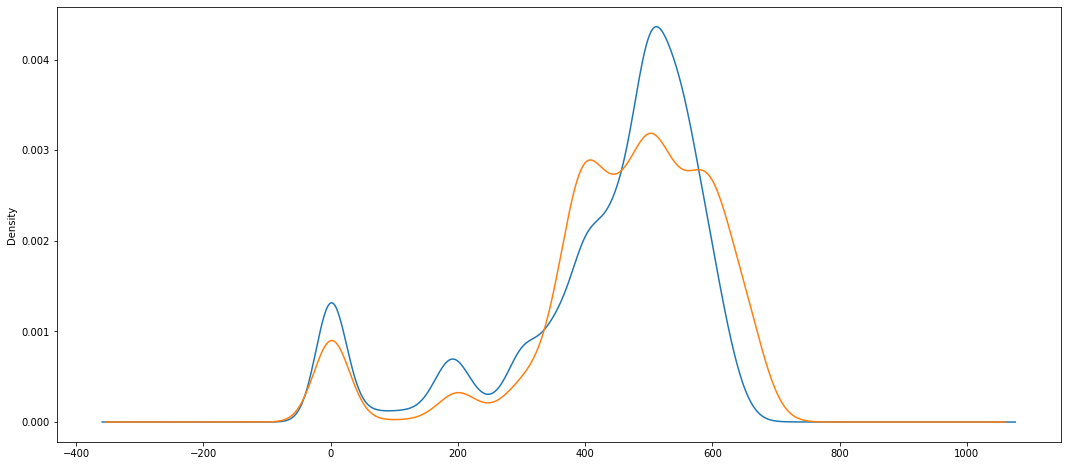

In [30]:
plt.figure(figsize = (18,8))
df_train['rougher.input.feed_rate'].plot.kde();
df_test['rougher.input.feed_rate'].plot.kde();
plt.show()

### Вывод:
При сравнении распределений на тестовой и обучающей выборках отмечено следующее:
- распределения схожи и на работу модели незначительные различия не повлияют;
- в обоих выборках есть аномальные значения, в том числе отрицательные, которые необходимо исключить.

---

### 2.3. Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [31]:
# Разделяем датафреймы на процессы
def process_division(data):
    # выделяем процессы
    rougher_input  =    [column for column in data.columns if 'rougher.input.feed' in column]
    rougher =           [column for column in data.columns if 'rougher' in column and 'concentrate_' in column]
    primary_cleaner =   [column for column in data.columns if 'primary_cleaner' in column and 'concentrate_' in column]
    final =             [column for column in data.columns if 'final' in column and 'concentrate' in column]
    
    # возвращаем словарь со списками
    return {'rougher_input'  : rougher_input ,
            'rougher':         rougher,            
            'primary_cleaner': primary_cleaner ,       
            'final':           final ,          
           }

In [32]:
process_division(df_full)['rougher_input'] 

['rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au']

In [33]:
# проверим работу функции
process_division(df_full)['rougher']

['rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

<font color='green'>Здорово, что нужные столбцы определяются автоматически. </font>


In [34]:
# проверим работу функции
process_division(df_full)['primary_cleaner']

['primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au']

In [35]:
# проверим работу функции
process_division(df_full)['final']

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au']

In [36]:
# выделяем датафреймы по процессам из общего датафрейма
rougher_input_df      = df_full[set(process_division(df_full)['rougher_input'])-set(['rougher.input.feed_rate','rougher.input.feed_size'])]     
rougher_df            = df_full[process_division(df_full)['rougher']]
primary_cleaner_df    = df_full[process_division(df_full)['primary_cleaner']]
final_df              = df_full[process_division(df_full)['final']]

In [37]:
# Суммируем значения концентраций веществ и выделяем в series
rougher_input_df_sum   = rougher_input_df.sum(axis=1)
rougher_df_sum         = rougher_df.sum(axis=1)
primary_cleaner_df_sum = primary_cleaner_df.sum(axis=1)
final_df_sum           = final_df.sum(axis=1)
# объединяем все series
sum_concentrate = pd.concat([rougher_input_df_sum , rougher_df_sum , primary_cleaner_df_sum , final_df_sum] , axis=1)
# меняем названия столбцов
sum_concentrate.columns = ['rougher_input_df' , 'rougher_df_sum' , 'primary_cleaner_df_sum' , 'final_df_sum']

In [38]:
sum_concentrate.head(10)


,rougher_input_df,rougher_df_sum,primary_cleaner_df_sum,final_df_sum
0,51.680034,66.424950,72.640924,63.644396
1,50.659114,67.012710,72.543485,63.957723
2,50.609929,66.103793,72.095042,64.311180
3,51.061546,65.752751,59.957723,63.573449
4,47.859163,65.908382,71.321010,64.004667
5,48.838521,64.955919,70.607932,63.646320
6,49.120760,65.372419,71.165854,63.156407
7,50.790724,65.180132,71.533310,62.908843
8,50.550288,65.625127,72.072013,64.185763
9,51.941235,65.408849,71.887397,64.185200


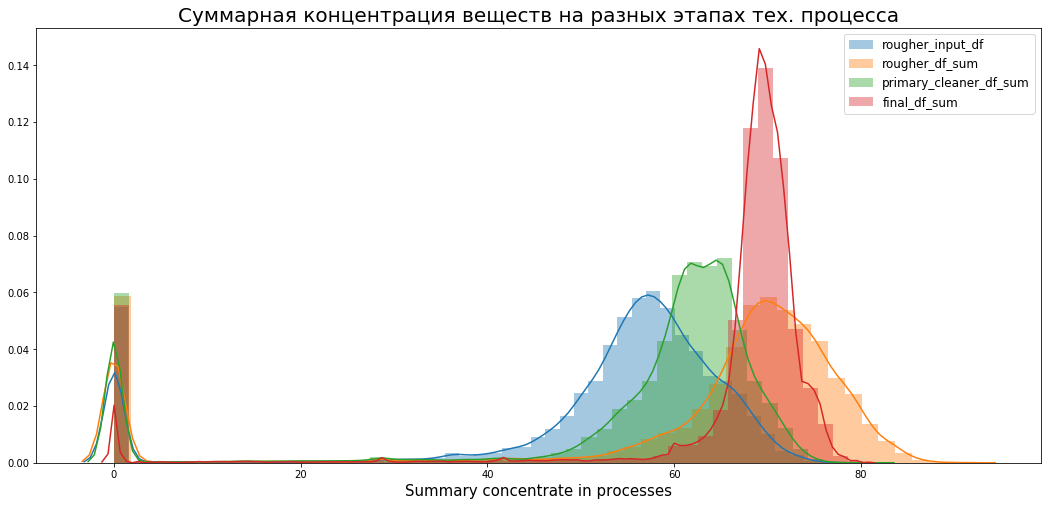

In [39]:
# строим графики распределения концентрации металла по процессам
plt.figure(figsize = (18,8))
for a in sum_concentrate.columns:
    ax = sns.distplot(sum_concentrate[a])
ax.set_title('Суммарная концентрация веществ на разных этапах тех. процесса', fontsize = 20)
ax.legend(sum_concentrate.columns , fontsize = 12)
ax.set_xlabel('Summary concentrate in processes',fontsize = 15)
plt.show()

### Удаляем выбросы из выборок 

#### Анализ признаков в обучающем и тестовом датасетах до удаления выбросов

In [40]:
def boxplot_outlier(data , feature_list , target):
    # Масштабируем данные для просмотра в одном масштабе
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.drop('date' , axis = 1))
    data_scaled = pd.DataFrame(data = data_scaled , columns = data.columns.drop('date'))

    # Строим boxplot для визуального определения выбросов
    plt.figure(figsize = (15,5))
    ax= sns.boxplot(x = 'variable' , y = 'value' , data = pd.melt(data_scaled[feature_list]))
    ax.set_xticklabels(labels = feature_list  ,rotation = 90)
    ax.set_title('Признаки для определения {}'.format(target) , fontsize = 20)
    return plt.show()

In [41]:
# Список Признаков для определения rougher output recovery
rougher_list = [column for column in df_test.columns if 'rougher' in column]

# Список Признаков для определения final output recovery
final_list = df_test.columns.drop('date')

print('Количество признаков для определения rougher.output.recovery: ' , len(rougher_list))
print('Количество признаков для определения final.output.recovery:   ' , len(final_list))

Количество признаков для определения rougher.output.recovery:  22
Количество признаков для определения final.output.recovery:    52


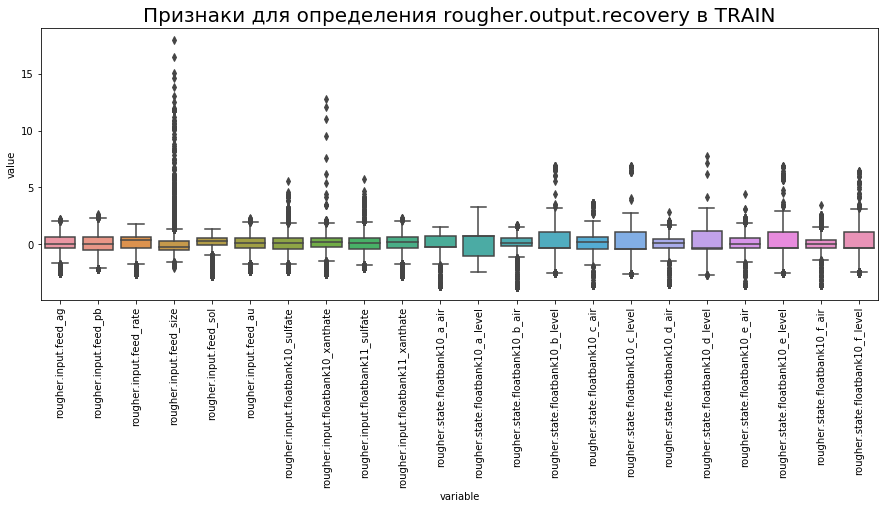

In [42]:
# Строим boxplot для исходных признаков rougher.output.recovery
boxplot_outlier(df_train , rougher_list , 'rougher.output.recovery в TRAIN')

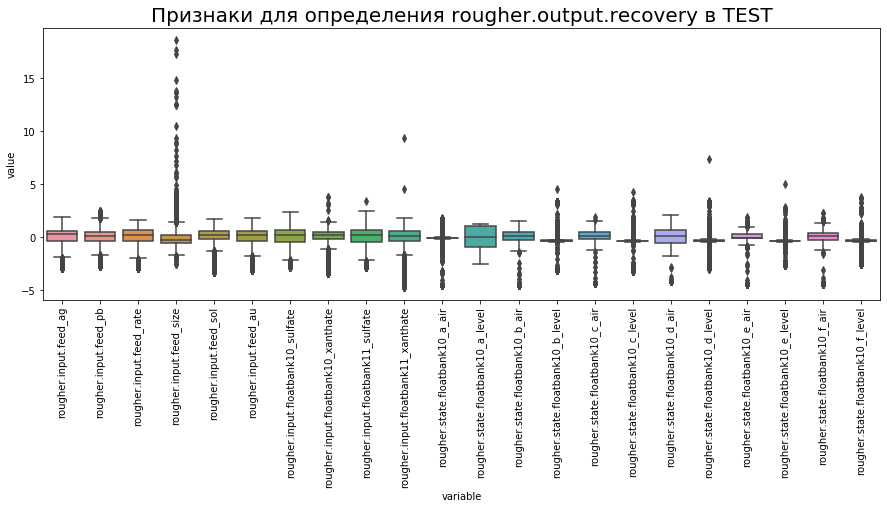

In [43]:
# Строим boxplot для исходных признаков rougher.output.recovery
boxplot_outlier(df_test , rougher_list , 'rougher.output.recovery в TEST')

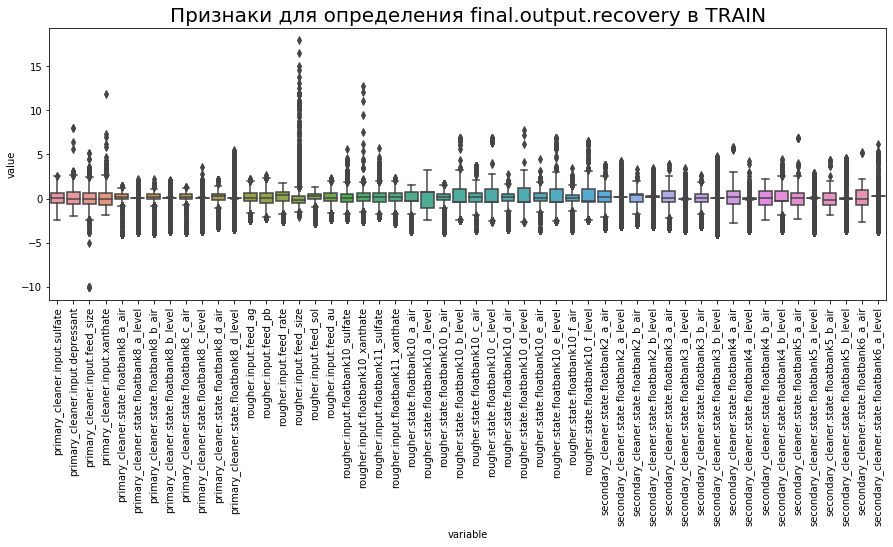

In [44]:
# Строим boxplot для исходных признаков final.output.recovery
boxplot_outlier(df_train , final_list , 'final.output.recovery в TRAIN')

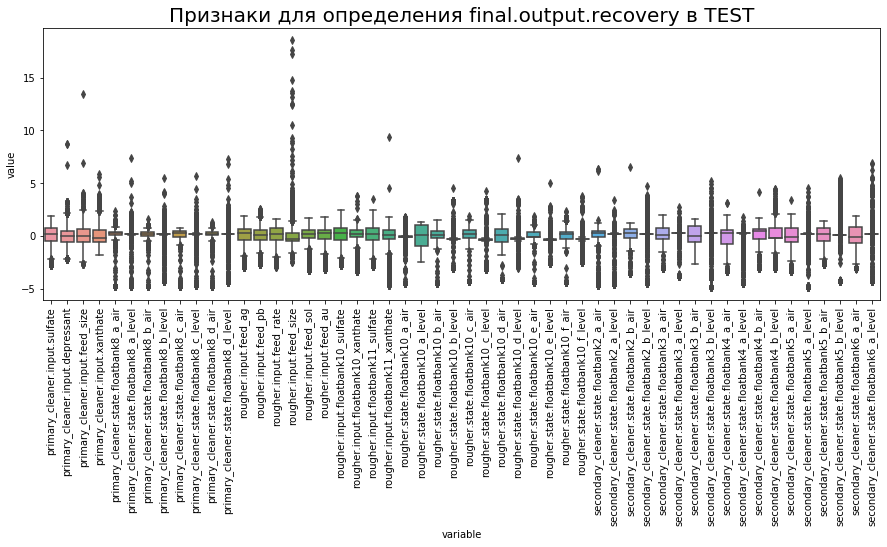

In [45]:
# Строим boxplot для исходных признаков final.output.recovery
boxplot_outlier(df_test , final_list , 'final.output.recovery в TEST')

#### Анализ признаков в обучающем и тестовом датасетах после удаления выбросов

In [46]:
# Функция определяет выбросы и выводит обработанную таблицу
def outliers_remove(data):
    # создаем общий список с признаками
    outlier_list = [column for column in data if 'rougher.input' in column or 'primary_cleaner.input' in column]
    Q1 = data[outlier_list].quantile(0.25)     # 25% квантиль
    Q3 = data[outlier_list].quantile(0.75)     # 75% квантиль
    IQR = Q3 - Q1
    lower = (Q1 - 1 * IQR)                       # нижняя граница выбросов
    upper = (Q3 + 1.5 * IQR)                       # верхняя граница выбросов
    # датафрейм с отсеченным выбросами в концентрациях, удаленными пропусками
    data = (data.iloc[data[outlier_list][(data[outlier_list] > lower) &
                                         (data[outlier_list] < upper)].dropna(axis=0).index].dropna(axis=0)
           )
    return data 

In [47]:
df_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

In [48]:
# удаляем выбросы из обучающей и тестовой выборок
df_train_clean = outliers_remove(df_train)
df_test_clean  = outliers_remove(df_test)


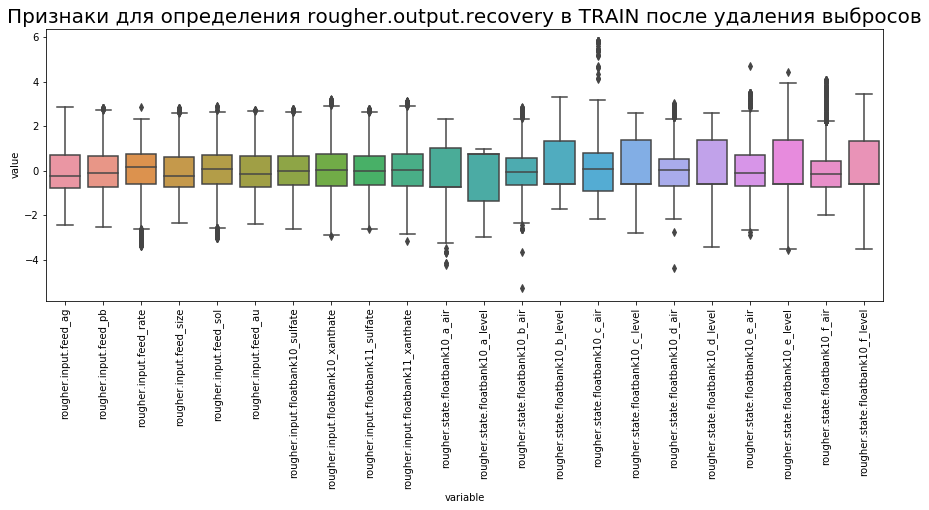

In [49]:
# Строим boxplot для исходных признаков rougher.output.recovery
boxplot_outlier(df_train_clean , rougher_list , 'rougher.output.recovery в TRAIN после удаления выбросов')

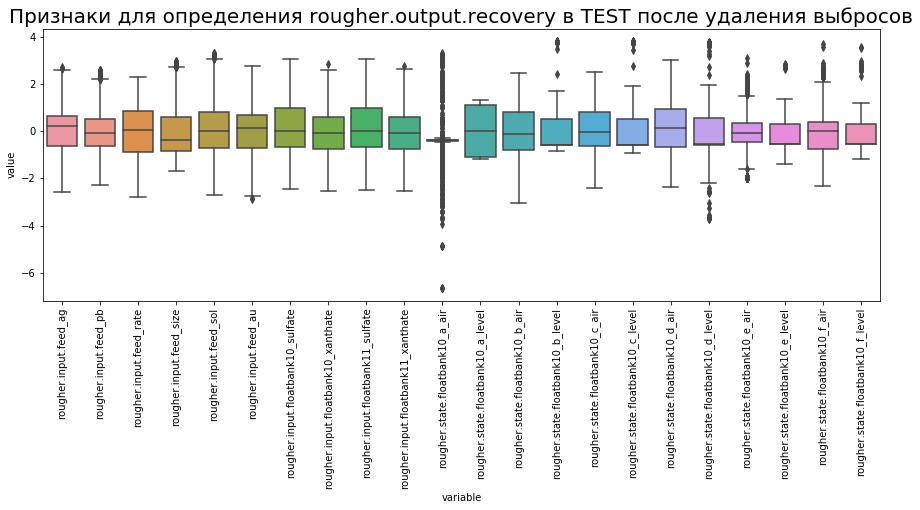

In [50]:
# Строим boxplot для исходных признаков rougher.output.recovery
boxplot_outlier(df_test_clean , rougher_list , 'rougher.output.recovery в TEST после удаления выбросов')

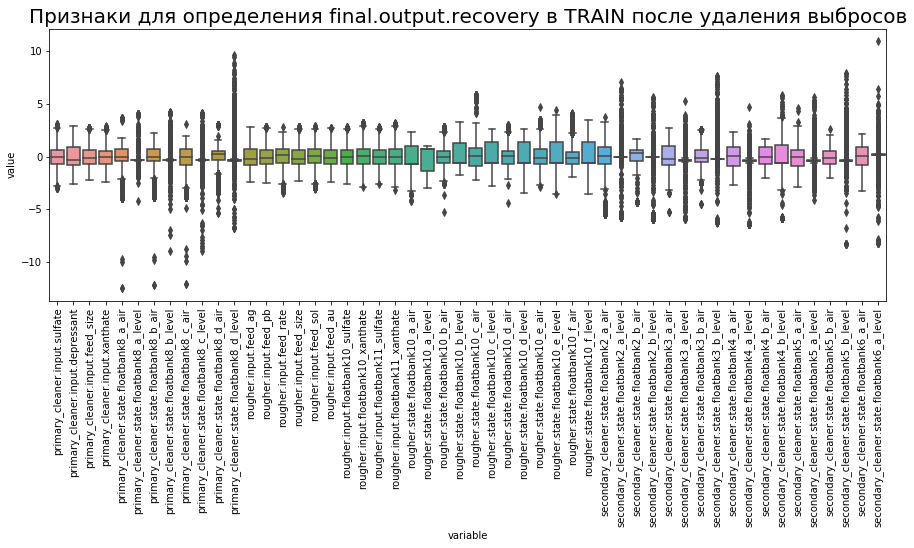

In [51]:
# Строим boxplot для исходных признаков final.output.recovery
boxplot_outlier(df_train_clean , final_list , 'final.output.recovery в TRAIN после удаления выбросов')

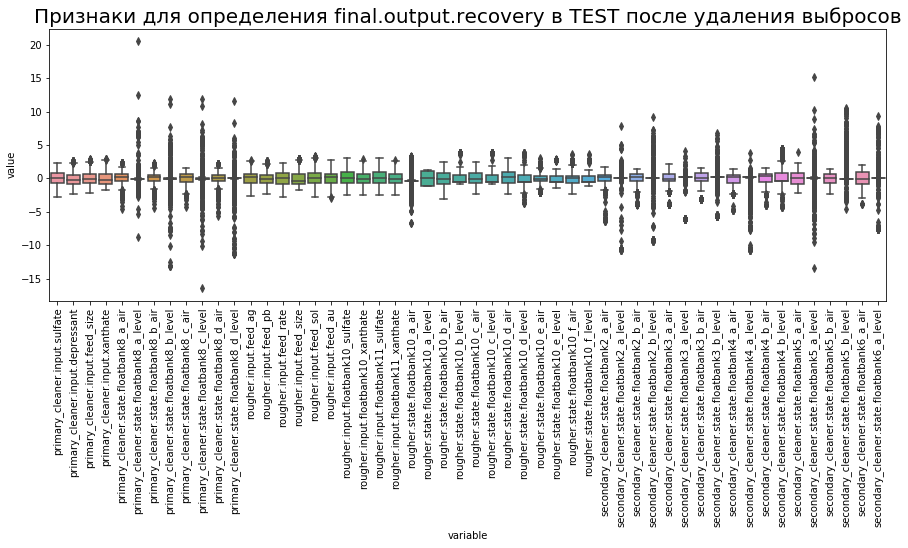

In [52]:
# Строим boxplot для исходных признаков final.output.recovery
boxplot_outlier(df_test_clean , final_list , 'final.output.recovery в TEST после удаления выбросов')

### Выводы:
Методом библиотеки seaborn построены распределения суммарных концентраций веществ для разных этапов очистки сырья.
Отмечены следующие особенности:
- в выборке есть большая доля выбросов, которые влияют на распределение.
- распределение концентраций веществ в исходном сырье и после грубой очистки близко к стандартному нормальному распределению.
- распределение концентраций веществ в финальном сырье имеет меньшую дисперсию, и соответственно меньший разброс значений. Чем Уже распределение концентраций после финальной очистки тем лучше работает производство, и выпускает более качественное сырье. 

#### Анализ выбросов
Для анализа выбросов выделены признаки, необходимые для определения значений rougher.output.recovery (22 признака) и final.output.recovery (52 признака). Для каждого набора признаков построены boxplot, на которых видны значительные выбросы. Для удобства представления все значения масштабированы методом StandardScaler().
Выбросы были удалены в признаках, определяющих параметры исходной руды (rougher.input) и в признаках на входе в первичную очистку (primary_cleaner.input). Выбросы определены значением межквартильного размаха. Нижняя граница интервала была завышена для исключению большего количества выбросов применением коэффициента 1,0 к значению IQR.

Удаление выбросов выполнено на немасштабированных датасетах. На этапе выделения признаков, и целевого признака.
При удаление выбросов из выборок исключено порядка 20% данных.

# 3. Модель

### Подготовка данных для модели

#### Подготовка данных rougher.output.recovery

In [79]:
# Обучающие признаки rougher.output.recovery
x_train_rougher = df_train_clean[rougher_list]

# Обучающие целевые признаки
y_train_rougher = np.array(df_train_clean['rougher.output.recovery'])

# Тестовые признаки
x_test_rougher = df_test_clean[rougher_list]

# Тестовый целевой признак
y_test_rougher = df_full[df_full['date'].isin(df_test_clean.date)]['rougher.output.recovery']

# Проверим размерности признаков
x_train_rougher.shape , y_train_rougher.shape , x_test_rougher.shape , y_test_rougher.shape

((12616, 22), (12616,), (4477, 22), (4477,))

#### Подготовка данных final.output.recovery 

In [54]:
# Список признаков для определения  final.output.recovery
x_train_final = df_train_clean[df_test_clean.columns.drop('date')].reset_index(drop = True)

# Обучающие целевые признаки для final.output.recovery
y_train_final = df_train_clean['final.output.recovery'].reset_index(drop = True)

# Обучающие целевые признаки rougher.output.recovery
y_train_rougher = df_train_clean['rougher.output.recovery'].reset_index(drop = True)

# Тестовые признаки
x_test_final = df_test_clean[df_test_clean.columns.drop('date')].reset_index(drop = True)

# Тестовый целевой признак final.output.recovery
y_test_final = df_full[df_full['date'].isin(df_test_clean.date)]['final.output.recovery'].reset_index(drop = True)

# Тестовый целевой признак rougher.output.recovery
y_test_rougher = df_full[df_full['date'].isin(df_test_clean.date)]['rougher.output.recovery'].reset_index(drop = True)

# Проверим размерности признаков
x_train_final.shape , y_train_final.shape , x_test_final.shape , y_test_final.shape ,

((12616, 52), (12616,), (4477, 52), (4477,))

In [76]:
# Функция для определения значения метрики sMape
def sMape(y_true , y_pred):
    return ((abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred))/2)).sum()/len(y_true))*100
smape = make_scorer(sMape , greater_is_better=False)

In [85]:
# Определяем и выводим напечать все матрики
def metrics(y_pred_r , y_pred_f , y_rougher , y_final ,  model_name , model):   
    # Считаем метрики
    R2_rougher    = r2_score(y_rougher , y_pred_r)   # Считаем значения метрики R2
    R2_final      = r2_score(y_final , y_pred_f)

    MAE_rougher   = mean_absolute_error(y_rougher , y_pred_r)
    MAE_final     = mean_absolute_error(y_final , y_pred_f )

    smape_rougher = smape(model , y_rougher , y_pred_r)
    smape_final   = smape(y_final , y_pred_f)

    print(model)
    print('')
    print('Итоговый sMape: {: .2f}'.format(0.25*smape_rougher + 0.75*smape_final ))
    print('R2-rougher:     {: .4f}'.format(R2_rougher))
    print('R2-final:       {: .4f}'.format(R2_final))
    print('')
    print('MAE-rougher:    {: .4f}'.format(MAE_rougher))
    print('MAE-final:      {: .4f}'.format(MAE_final))
    print('')
    print('sMape-rougher:  {: .4f}'.format(smape_rougher))
    print('sMape-final:    {: .4f}'.format(smape_final))

### LinearRegression()

In [72]:
# Функция для предсказания значений Линейной регрессией
def linear_regression(x_train , y_train):
    # Проверяем модель на кросс валидации
    linearmodel = LinearRegression()
    scores = cross_val_score(linearmodel , x_train , y_train , cv=5 , scoring = smape)
    return scores

#### Проверка модели для определения rougher.output.recovery

In [73]:
linear_regression(x_train_rougher , y_train_rougher) # Обучение модели

#### Проверка модели для определения final.output.recovery

In [74]:
linear_regression(x_train_final , y_train_final) # Обучение модели

#### Метрики LinearRegression()

In [86]:
metrics(y_pred_r_linear , y_pred_f_linear , y_train_rougher , y_train_final ,  'Линейная регрессия')


TypeError: __call__() missing 1 required positional argument: 'y_true'

In [80]:
y_pred_f_linear

array([68.51120867, 67.99987311, 68.50940887, ..., 61.43425869,
       60.93998358, 61.09705466])

In [81]:
y_train_rougher

array([87.10776293, 86.84326051, 86.84230826, ..., 87.6847173 ,
       90.67736126, 91.81662274])

#### RandomForestRegressor

In [493]:
# Модель случайный лес
# Словарь для записи промежуточных параметров и поиска оптимального точности
def Randomforest_param_search(x , y):
    result_random_r={}

# Цикл для поиска оптимальных гиперпараметров
    for estim in range(20 , 40 , 2):
        for depth in range(2 , 6):
            random_for_model = RandomForestRegressor(random_state = 12 , 
                                                     n_estimators = estim , 
                                                     max_depth = depth )
            y_pred = cross_val_predict(random_for_model , x , y , cv=5)       
            result_random_r[estim , depth] = smape(y , y_pred)
# Оптимальные гиперпараметры
    error_list = list(result_random_r.values())
    # Список ключей словаря ошибок
    param_list = list(result_random_r.keys())
    # Минимальный sMape
    min_score = min(list(result_random_r.values()))
    # Значение гиперпараметра при известной максимальной точности
    result_param = param_list[error_list.index(min_score)]
    
    print('Оптимальное n_estimators:', result_param[0])
    print('Оптимальное max_depth:' , result_param[1])
    print('Минимальное sMape:' , min_score)
    return result_param[0] , result_param[1]

#### Модель для определения rougher.output.recovery

In [494]:
# Ищем оптимальные значения
best_forest_estim_r  , best_forest_depth_r = Randomforest_param_search(x_train_rougher , y_train_rougher)

Оптимальное n_estimators: 32
Оптимальное max_depth: 4
Минимальное sMape: 10.58177117897856


In [495]:
# Обучаем модель с учетом оптимальных гиперпараметров
random_for_model = RandomForestRegressor(random_state = 12 , 
                                                     n_estimators = best_forest_estim_r , 
                                                     max_depth = best_forest_depth_r )
y_pred_r_random = cross_val_predict(random_for_model , x_train_rougher , y_train_rougher , cv=5)

#### Модель для определения final.output.recovery


In [496]:
# Ищем оптимальные значения
best_forest_estim_f  , best_forest_depth_f = Randomforest_param_search(x_train_final , y_train_final)

Оптимальное n_estimators: 26
Оптимальное max_depth: 4
Минимальное sMape: 8.719130042056133


In [497]:
# Обучаем модель с учетом оптимальных гиперпараметров
random_for_model = RandomForestRegressor(random_state = 12 , 
                                                     n_estimators = best_forest_estim_f , 
                                                     max_depth = best_forest_depth_f )
y_pred_f_random = cross_val_predict(random_for_model , x_train_final , y_train_final , cv=5)

#### Метрики RandomForestRegressor()

In [498]:
metrics(y_pred_r_random , y_pred_f_random , y_train_rougher , y_train_final ,'Случайный лес')

Случайный лес

Итоговый sMape:  9.18
R2-rougher:     -0.0184
R2-final:        0.1440

MAE-rougher:     7.2690
MAE-final:       5.5450

sMape-rougher:   10.5818
sMape-final:     8.7191


#### Самая простая модель - заполняем средними значениями

In [499]:
# Создаем массив со средними значениями
y_pred_simple_r_train = pd.Series(df_train_clean['rougher.output.recovery'].mean(), index = range(0,len(df_train_clean)))

In [500]:
# Создаем массив со средними значениями
y_pred_simple_f_train = pd.Series(df_train_clean['final.output.recovery'].mean(), index = range(0,len(df_train_clean)))

In [501]:
metrics(y_pred_simple_r_train , y_pred_simple_f_train , y_train_rougher , y_train_final ,'Модель средних значений')

Модель средних значений

Итоговый sMape:  10.08
R2-rougher:      0.0000
R2-final:        0.0000

MAE-rougher:     7.8985
MAE-final:       6.2021

sMape-rougher:   11.3481
sMape-final:     9.6584


### Decision Tree

In [502]:
# Модель деревья решений
# Словарь для записи промежуточных параметров и поиска оптимального точности
def decisiontree_param_search(x , y):
    result_random_r={}

# Цикл для поиска оптимальных гиперпараметров
    for depth in range(2 , 10):      
        random_for_model = DecisionTreeRegressor(random_state = 12 ,                                                      
                                                 max_depth = depth )
        y_pred = cross_val_predict(random_for_model , x , y , cv=5)       
        result_random_r[depth] = smape(y , y_pred)
# Оптимальные гиперпараметры
    error_list = list(result_random_r.values())
    # Список ключей словаря ошибок
    param_list = list(result_random_r.keys())
    # Минимальный sMape
    min_score = min(list(result_random_r.values()))
    # Значение гиперпараметра при известной максимальной точности
    result_param = param_list[error_list.index(min_score)]    
    
    print('Оптимальное max_depth:' , result_param)
    print('Минимальное sMape:' , min_score)
    return result_param

#### Модель для определения rougher.output.recovery

In [503]:
# Ищем оптимальные значения
best_max_depth_r = decisiontree_param_search(x_train_rougher , y_train_rougher)

Оптимальное max_depth: 5
Минимальное sMape: 11.160042944030414


In [504]:
# Обучаем модель с учетом оптимальной глубины.
random_for_model = DecisionTreeRegressor(random_state = 12 ,                                                    
                                         max_depth = best_max_depth_r )
y_pred_r_tree = cross_val_predict(random_for_model , x_train_rougher , y_train_rougher, cv=5)

#### Модель для определения final.output.recovery

In [505]:
# Ищем оптимальные значения
best_max_depth_f = decisiontree_param_search(x_train_final , y_train_final)

Оптимальное max_depth: 3
Минимальное sMape: 9.545581432020219


In [506]:
# Обучаем модель с учетом оптимальной глубины.
random_for_model = DecisionTreeRegressor(random_state = 12 ,                                                    
                                         max_depth = best_max_depth_f )
y_pred_f_tree = cross_val_predict(random_for_model , x_train_final , y_train_final , cv=5)

#### Метрики Decision Tree

In [507]:
metrics(y_pred_r_tree , y_pred_f_tree , y_train_rougher , y_train_final ,'Модель деревья решений')

Модель деревья решений

Итоговый sMape:  9.95
R2-rougher:     -0.0569
R2-final:        0.0249

MAE-rougher:     7.6770
MAE-final:       6.0954

sMape-rougher:   11.1600
sMape-final:     9.5456


### SVR()

In [508]:
# Функция для предсказания значений Линейной регрессией
def svr(x_train , y_train):
    # Проверяем модель на кросс валидации
    svr = SVR(gamma = 'scale')
    y_pred = cross_val_predict(svr , x_train , y_train , cv=5)
    return y_pred

#### Проверка модели для определения rougher.output.recovery

In [509]:
y_pred_r_svr = svr(x_train_rougher , y_train_rougher) # Обучение модели

#### Проверка модели для определения final.output.recovery

In [510]:
y_pred_f_svr = svr(x_train_final , y_train_final) # Обучение модели

#### Метрики SVR()

In [511]:
metrics(y_pred_r_svr , y_pred_f_svr , y_train_rougher , y_train_final ,  'Метод опорных векторов')

Метод опорных векторов

Итоговый sMape:  9.86
R2-rougher:     -0.0727
R2-final:        0.0158

MAE-rougher:     7.2531
MAE-final:       6.1924

sMape-rougher:   10.4763
sMape-final:     9.6501


## Итоговая модель RandomForestRegressor()

#### Проверка модели для определения rougher.output.recovery

In [512]:
random_for_model_r = RandomForestRegressor(random_state = 12 , 
                                                     n_estimators = best_forest_estim_r , 
                                                     max_depth = best_forest_depth_r )
random_for_model_r.fit( x_train_rougher , y_train_rougher )
y_pred_r_random = random_for_model_r.predict(x_test_rougher)

#### Проверка модели для определения final.output.recovery

In [513]:
random_for_model_f = RandomForestRegressor(random_state = 12 , 
                                                     n_estimators = best_forest_estim_f , 
                                                     max_depth = best_forest_depth_f )
y_pred_f_random = random_for_model_f.fit(x_train_final , y_train_final)
y_pred_f_random = random_for_model_f.predict(x_test_final)

#### Метрики итоговой модели RandomForestRegressor()

In [514]:
metrics(y_pred_r_random , y_pred_f_random , y_test_rougher , y_test_final ,  'ИТОГОВАЯ МОДЕЛЬ СЛУЧАЙНЫЙ ЛЕС')

ИТОГОВАЯ МОДЕЛЬ СЛУЧАЙНЫЙ ЛЕС

Итоговый sMape:  8.34
R2-rougher:     -0.0046
R2-final:       -0.0465

MAE-rougher:     6.2026
MAE-final:       5.2001

sMape-rougher:   9.4537
sMape-final:     7.9719


### Вывод:

Для обучения моделей, определяющих параметр восcтановления после грубой очистки (rougher.output.recovery) и после финишной очистки (final.output.recovery), были выбраны признаки в соответствии с технологий производства. Так для определения rougher.output.recovery выделено 22 признака, для final.output.recovery 52 признака. Значения всех признаков были отмасштабированы методо StandardScaler().
На обучающих данныех кросс-валидацией были проверены следующие модели:
1. Линейная регрессия.            Итоговый sMape: 11.44.
2. Случайный лес.                 Итоговый sMape: 9.18.
3. Модель "все значения средние". Итоговый sMape: 10.08.
4. Деревья решений.               Итоговый sMape: 9.95.
5. Метод опорных векторов.        Итоговый sMape: 9.86.

По минимальному значению метрики sMape и скорости работы была выбрана модель RandomForestRegressor() .
Значение метрики sMape на тестовых данных составило 8,34.

Небольшое отличие модели среднего от более сложных моделей говорит о том, что использование моделей машинного обучение не эффективно и необходимо оптимизировать модели для уменьшения метрики.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке